# Tema 10: Procesamiento del Lenguaje Natural (I) - Nubes de palabras

El procesamiento del lenguaje natural es el estudio científico del lenguaje desde un punto de vista computacional.

En español lo encontraréis abreviado como PLN o como NLP, que son las siglas en inglés; pero cuidado porque NLP también hace referencia a la programación neurolingüística, que no tiene nada que ver. Por eso en inglés hay quien empieza a abreviarlo como NLProc.

En el repositorio de Víctor Peinado con los materiales de su asignatura para el máster en Data Science de KSchool hay una [introducción al PLN](https://github.com/vitojph/kschool-nlp-19/blob/master/Intro-NLProc.pdf) muy buena y concisa que habla un poco de su historia, objetivos, enfoques y tareas típicas.

## Por qué usar nubes de palabras para explorar textos

Veamos el PLN como una rama del Data Science. En Data Science se puede trabajar con muchos tipos distintos de datos: números (transacciones de dinero, valoraciones de servicios, precipitaciones, precios...), imágenes, mapas, textos... Todo eso hay que representarlo en el programa (igual que hacíamos con los ficheros):
- los números son lo más fácil de representar, los lenguajes de programación ya cuentan con tipos primitivos para representarlos.
- las imágenes y los mapas al final se pueden reducir a píxeles y coordenadas, así que tampoco hay demasiado problema.
- ... pero los textos dan muchos quebraderos de cabeza para representarlos de forma justa en un programa informático.

Piensa que podríamos elegir el número 1 para la primera palabra de nuestro texto, por ejemplo "La", y el 2 para la segunda, por ejemplo "silla". Pero decimos que no es una representación justa porque la relación entre 1 y 2 no es la misma que entre "La" y "silla": "silla" no es el doble que "La", no es mayor que "La", "La" + "La" no es igual a "silla"... Desde luego, no podemos operar con las palabras representándolas así. Por eso actualmente se prefiere utilizar [embeddings](https://www.youtube.com/watch?v=RkYuH_K7Fx4).

Todo esto viene porque en Data Science siempre se trabaja con datos; un conjunto de datos recopilado para realizar una tarea determinado se llama _dataset_. Pues bien, una de las primeras tareas que se hacen antes de cualquier análisis es explorar tal dataset, que suelen ser archivos en formato csv (_comma separated values_ o _valores separados por comas_) y tener esta pinta:

    "carat","cut","color","clarity","depth","table","price","x","y","z"
    1.5,"Fair","G","SI1",64.5,57,10352,7.15,7.09,4.59
    0.7,"Ideal","E","VS2",61.4,57,2274,5.72,5.78,3.53
    1.22,"Premium","G","VS1",61.3,58,8779,6.91,6.89,4.23
    0.51,"Premium","E","VS2",62.5,60,1590,5.08,5.1,3.18
    2.02,"Very Good","J","SI2",59.2,60,11757,8.27,8.39,4.91
    0.7,"Very Good","E","SI1",63.2,61,2164,5.61,5.49,3.51
    0.46,"Ideal","G","VVS1",60.7,57,1453,4.98,5.03,3.04
    0.55,"Premium","F","SI2",60.6,58,1175,5.28,5.31,3.21
    ...

Este es el famoso dataset [diamonds](https://www.kaggle.com/shivam2503/diamonds), que como ves contiene 10 columnas con distintas medidas relevantes cuando hablamos de diamantes: los quilates, el corte, el color, etc. y -esto ya te lo digo yo- casi 54 000 filas con valores para esas medidas, cada una representando un diamante. (Kaggle es un gran sitio donde encontrar datasets de todo tipo, por cierto.)

Pues bien, con solo mirar 8 filas ya nos hemos hecho una idea de lo que contiene el dataset: `carat` oscila entre 0 y 3, `cut` parece hablarnos de la calidad del diamante, se nos dice el color de cada diamante, `clarity` está en códigos alfanuméricos que tendremos que buscar cómo descodificar, etc.

Pero si echamos un vistazo a las primeras líneas de un archivo de texto... ¡no nos dice mucho! Hagamos la prueba con los primeros tuits del dataset que trataremos más abajo.

    'Las 50 mentiras del gobierno en la pandemia. No se pierdan este video con los tres ejes de la estrategia del gobierno frente al coronavirus: mentir, mentir y mentir. #Loret @latinus_us: https://t.co/eze4zcfF5x'
    '🔴 ÚLTIMA HORA | Francia ordena el confinamiento total de la región de París por un mes https://t.co/bNldTn8gRR'
    '🗣️ ¡𝐓𝐎𝐌𝐀 𝐏𝐑𝐄𝐂𝐀𝐔𝐂𝐈𝐎́𝐍!✍️🇻🇪  Es importante tener en cuenta las medidas de prevención del coronavirus. No podemos bajar la guardia, recuerda que es por tu salud y la de los tuyos #HitoBicentenario3millones500mil'
    'Esta madrugada falleció mi papá en el Poliedro de Caracas, víctima del coronavirus.  No puedo llorarlo como se debe, no puedo expresar el dolor como se debe, debo estar tranquilo porque tengo la enfermedad y no quiero dejar sola a mi mamá, que está ingresada en el poliedro.'
    '🗣️¡𝐄𝐒 𝐂𝐎𝐍𝐓𝐈𝐆𝐎! ✍️🇻🇪 Evitar la propagación de las enfermedades respiratorias agudas es evitar la entrada del Coronavirus. Seguir las recomendaciones generales es generar los mejores hábitos de salud.    #LaCovidNoJuega'
    'Portavoz del Gobierno iraní: Eliminación de sanciones y lucha contra el coronavirus, principales cuestiones de la agenda para el Año Nuevo  #HitoBicentenario3millones500mil  #DaleUnParaoALaCovid19  https://t.co/xMo16G0iIT'

La mayoría parece que hablan de la gestión política del coronavirus, pero ¿tenemos una visión global del dataset? ¿Podemos asegurar que todos los tuits hablan sobre eso? Lo cierto es que el resto del archivo puede ser muy diferente.

Por supuesto, con solo mirar el principio de diamonds también podemos hacernos una idea equivocada. Pero existen métodos (como `.shape()`, `.info()`, `.describe()`, etc. en la librería `pandas`) que devuelven los valores máximos, mínimos, la media... de cada una de las columnas, nos dicen cuántas filas hay... Y sin embargo no existen funciones de este tipo para texto.

Es en este punto donde podemos recurrir a las nubes de palabras: aparte de la función estética, las nubes de palabras se usan en ocasiones para explorar datos de tipo textual. Aunque, por supuesto, una nube de palabras puede ser una tarea en sí misma, no solo como primer paso en una tarea de Data Science.

## Qué vamos a hacer
En este cuaderno vamos a generar una nube de palabras con la librería `wordcloud`. Para saber cómo usarla (qué hace, cómo le tenemos que pasar los datos) miramos en la documentación. Para ello, buscamos la librería en PyPI y llegamos a [esta página](https://pypi.org/project/wordcloud/). Allí nos redirigen a http://amueller.github.io/word_cloud/, donde podemos ver una [galería de ejemplos](http://amueller.github.io/word_cloud/auto_examples/index.html).

En este caso vamos a elegir el [Using frequency](amueller.github.io/word_cloud/auto_examples/frequency.html). Lo importante de este código es que existe un objeto WordCloud al que le podemos aplicar el método `.generate_from_frequencies()` pasándole como parámetro un diccionario de frecuencias de nuestro texto. Un diccionario de frecuencias de un texto no es más que un diccionario cuyas claves son todas las palabras de dicho texto y cuyos valores son el número de veces que cada una de esas palabras aparecen en el texto.

Para que nos entendamos y tengamos una visión global de la tarea, vamos a hacer una prueba con un diccionario pequeño. Representaremos con `cosa` y `tema` palabras muy usadas, a las que pondremos un valor alto; como palabras con menos uso vamos a poner `Python` y `dataset`:

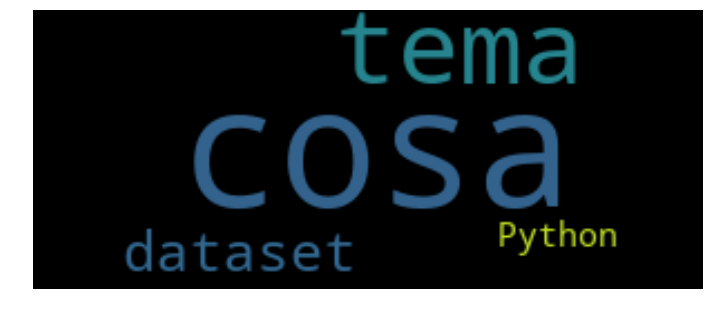

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Inventamos un diccionario de frecuencias
word_freq = {"cosa": 80, "tema": 75, "Python": 1, "dataset": 5}

# Generar nube de palabras
wc = WordCloud(width=300, height=125, max_words=50, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Como ves, el tamaño de las palabras en la nube indica de forma visual el peso de esa palabra en el texto que representa.

Ahora que hemos visto cómo funciona... ¡Manos a la obra! Usemos un texto real.

## Leer ficheros csv
Si vamos a trabajar con datos tenemos que saber lo que es un fichero csv y poder manejarnos con este formato, porque es ampliamente utilizado.

Existen librerías más eficientes para ello, como `pandas`, que la hemos mencionado antes, pero no vamos a meternos ahora a usarla. Pero como solo necesitamos echar un vistazo al fichero y después usar solo el texto, vamos a usar el módulo `csv`, que viene por defecto con Python y no hay que instalar nada.

Vamos a leer el fichero `tweets.csv`, que has tenido que descargar junto con los cuadernos de este tema:

In [9]:
import csv

# Leer fichero csv
with open("tweets.csv", encoding="UTF-8") as dataset_csv:
    reader = csv.reader(dataset_csv, delimiter=",", quotechar='"')
    data_read = [row for row in reader]

print(data_read)

[['tweet_id', 'tweet_text', 'user_id', 'user_handle', 'user_name', 'user_location', 'timestamp'], ['1372732957937532929', 'Las 50 mentiras del gobierno en la pandemia. No se pierdan este video con los tres ejes de la estrategia del gobierno frente al coronavirus: mentir, mentir y mentir. #Loret @latinus_us: https://t.co/eze4zcfF5x https://t.co/flrz3l5h3t', '68844197', 'CarlosLoret', 'Carlos Loret de Mola', 'México, DF.', '2021-03-19 02:13:35'], ['1372614591247740930', '🔴 ÚLTIMA HORA | Francia ordena el confinamiento total de la región de París por un mes https://t.co/bNldTn8gRR https://t.co/cCDRkM32uZ', '7996082', 'el_pais', 'EL PAÍS', 'Madrid', '2021-03-18 18:23:15'], ['1372645230881599492', '🗣️ ¡𝐓𝐎𝐌𝐀 𝐏𝐑𝐄𝐂𝐀𝐔𝐂𝐈𝐎́𝐍!✍️🇻🇪  Es importante tener en cuenta las medidas de prevención del coronavirus. No podemos bajar la guardia, recuerda que es por tu salud y la de los tuyos #HitoBicentenario3millones500mil https://t.co/9URLbBbOus', '839299289792774144', 'Mippcivzla', 'MIPPCI', 'Venezuela', '20

Fíjate en que se trata de una lista de listas. Cada una de las listas corresponde a un tuit, excepto la primera, que la cabecera.

Vemos que el dataset contiene metadatos sobre cada tuit: su número de identificación, su autor, su ubicación, el momento de su publicación... Pero solo nos interesa el texto:

In [10]:
tweets = []
for lista in data_read[1:]: # ignoramos la cabecera
    tweets.append(lista[1]) # añadimos solo el texto del tuit

tweets[:20]

['Las 50 mentiras del gobierno en la pandemia. No se pierdan este video con los tres ejes de la estrategia del gobierno frente al coronavirus: mentir, mentir y mentir. #Loret @latinus_us: https://t.co/eze4zcfF5x https://t.co/flrz3l5h3t',
 '🔴 ÚLTIMA HORA | Francia ordena el confinamiento total de la región de París por un mes https://t.co/bNldTn8gRR https://t.co/cCDRkM32uZ',
 '🗣️ ¡𝐓𝐎𝐌𝐀 𝐏𝐑𝐄𝐂𝐀𝐔𝐂𝐈𝐎́𝐍!✍️🇻🇪  Es importante tener en cuenta las medidas de prevención del coronavirus. No podemos bajar la guardia, recuerda que es por tu salud y la de los tuyos #HitoBicentenario3millones500mil https://t.co/9URLbBbOus',
 'Esta madrugada falleció mi papá en el Poliedro de Caracas, víctima del coronavirus.  No puedo llorarlo como se debe, no puedo expresar el dolor como se debe, debo estar tranquilo porque tengo la enfermedad y no quiero dejar sola a mi mamá, que está ingresada en el poliedro.',
 '🗣️¡𝐄𝐒 𝐂𝐎𝐍𝐓𝐈𝐆𝐎! ✍️🇻🇪 Evitar la propagación de las enfermedades respiratorias agudas es evitar la entrada d

Ahora hemos pasado a una lista de strings: solo los tuits.

## Generar un diccionario de frecuencias
Toca generar el diccionario de frecuencias. Para ello vamos a definir una función que primero separe cada tuit en palabras y meta todas las palabras en una lista, que llamaremos `word_list`.

Si recuerdas bien, en el curso hemos usado `.append()` para agregar un elemento a una lista. Pero esta vez usaremos `.extend()`, que es parecido, pero lo que añade no es un elemento, sino todos los elementos que contenga la lista que le pasemos. Sirve para cuando queremos añadir varios elementos de una lista a otra, pero ahorrándonos el paso de separarlos primero para ir añadiéndolos uno a uno, como nos exigiría `.append()`.

Pero, un momento... en las listas puede haber elementos repetidos, y lo ideal para esta tarea es que no los hubiera, sino que cada palabra aparezca una sola vez. Podríamos preguntarnos: ¿no sería mejor usar un conjunto?

Pues... sí y no. En el diccionario de frecuencias vamos a querer que cada palabra aparezca solo una vez, eso está claro. Pero ahora mismo necesitamos que las palabras se guarden repetidas, ahora veremos por aquí. Lo primero lo vamos a solventar en el siguiente paso: crearemos un diccionario cuyas claves sean los elementos de `word_list`. Como las claves de un diccionario no se pueden repetir, problema solucionado.

Finalmente, con `.count()` averiguaremos cuántas veces aparece cada palabra en `word_list` (para eso necesitábamos que las palabras se pudieran repetir) y los resultados los asignaremos como valores a esas claves.

In [11]:
def gen_freq(texts_list):
    # Creamos word_list
    word_list = []

    # Recorremos la lista de tuits y almacenamos todas las palabras en word_list
    for text in texts_list:
        word_list.extend(text.split())
    
    # Creamos freq_dict
    freq_dict = {}
    
    # Recorremos word_list, calculamos cuántas veces aparece cada palabra
    # y se lo asignamos a una clave en freq_dict que contiene la palabra misma
    for word in word_list:
        freq_dict[word] = word_list.count(word)
    
    return freq_dict

Una vez tenemos creada nuestra función, se la aplicamos a `tweets`, nuestra lista de tuits, para obtener el diccionario de frecuencias, que llamaremos `word_freq`. Puede tardar unos minutos, por eso lo aislamos en una celda propia:

In [12]:
word_freq = gen_freq(tweets)

Y ahora podemos consultar la frecuencia de las palabras que se nos ocurran; por ejemplo, dos muy frecuentes y dos menos frecuentes:

In [13]:
print(word_freq["la"])
print(word_freq["es"])
print(word_freq["gobierno"])
print(word_freq["virus"])

2725
867
102
153


## Generar una nube de palabras
Sin más, vamos a pintar nuestra nube de palabras. Como hemos hecho antes, solo hay que importar el módulo `pyplot` de la librería `matplotlib`, que es la parte que propiamente va a pintar, y el objeto `WordCloud` de `wordcloud`. Usamos el método `.generate_from_frequencies()` sobre WordCloud pasándole nuestro diccionario de frecuencias y el resto son parámetros que hemos copiado del ejemplo:

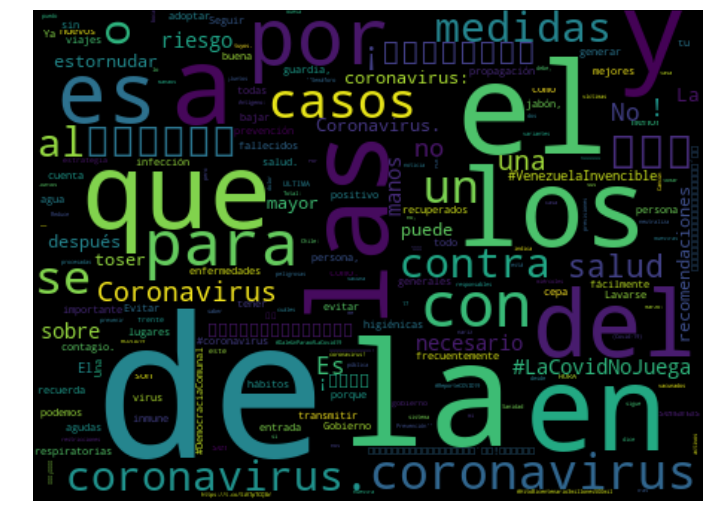

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generamos la nube de palabras
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

¡Preciosa!

Lo que pasa es que tiene mucho ruido. Si te fijas, estos son algunos de los problemas que tiene:
- las palabras más frecuentes no nos dicen nada: "de", "la", "el", "las", "que", "por" no nos dan pistas sobre de qué va el texto. Esto podemos solucionarlo excluyendo estas palabras.
- _coronavirus._, _coronavirus:_ y _coronavirus_ en realidad son la misma palabra, solo que algunas con puntuación detrás, así que deberían estar agrupadas. Esto podemos solucionarlo excluyendo la puntuación.
- _el_ y _El_ también representan una misma palabra, así que igualmente deberían caer en un mismo saco. Esto lo podemos solucionar pasando todas las palabras a minúsculas.

Pasemos a código todas estas soluciones.

## Excluir las _stopwords_
Las _stopwords_ o _palabras vacías_ son aquellas que pertenecen a categorías cerradas de palabras, es decir, aquellas categorías en que no se generan palabras nuevas, al menos no tan rápidamente como en las otras. Estamos hablando de conjunciones, determinantes, preposiciones, pronombres, verbos auxiliares, verbos copulativos... Otra característica que comparten estas palabras es que sirven de "pegamento" a las demás, aportan cohesión al texto, pero no aportan demasiado significado. Como están presentes en todos los textos, no nos dicen casi nada sobre cada uno de ellos en concreto. Esto podemos solucionarlo excluyendo estas palabras. Casi siempre "de", "la", "que"... encabezan el [ránking](https://www.clarin.com/sociedad/palabras-mas-usadas-espanol-comunes-frecuentes-diccionario-real_academia_espanola_0_ByLqjSFvmg.html). Como curiosidad, en cualquier idioma, siempre se distribuyen siguiendo la [ley de Zipf](https://en.wikipedia.org/wiki/Zipf%27s_law).

Casi todos los sistemas de procesamiento de lenguaje natural cuentan con alguna lista de stopwords para poder excluirlas o vetarlas en algún momento. Pero otras veces interesará tenerlas en cuenta porque forman parte de muchas expresiones: "muy bien", "más o menos", "que descanses"...

¿Y cómo obtenemos la lista de stopwords en español? En realidad no hay una lista cerrada, sino que circulan muchas por internet muy parecidas unas a otras, al ser un recurso tendente a la subjetividad (¿qué es una stopword y qué no?) y muy fácil de compartir (una simple lista de palabras, relativamente corta). Lo mejor es elegir una e ir "curándola" para nuestros propósitos, viendo si funciona bien o le falta o sobra algo.

En este caso hemos elegido la lista de stopwords en español de [este repositorio](https://github.com/Alir3z4/stop-words), que contiene las listas de muchos idiomas más.

In [18]:
stopwords = {'habidos', 'tendríamos', 'otro', 'nosotros', 'qué', 'estés', 'estábamos', 'estaremos',
             'fuera', 'tendría', 'cual', 'vosotros', 'hayas', 'fueron', 'estuvieras', 'estuvimos',
             'unos', 'hubiésemos', 'habrán', 'habríais', 'en', 'esos', 'pero', 'seríais', 'estuviesen',
             'soy', 'estáis', 'hayáis', 'te', 'mía', 'teniendo', 'otra', 'le', 'antes', 'tendréis',
             'habremos', 'durante', 'estada', 'fui', 'tenemos', 'están', 'estados', 'hayamos',
             'tendrían', 'nuestro', 'hubimos', 'estar', 'estará', 'tú', 'tuvieron', 'nosotras',
             'la', 'hubo', 'serán', 'esté', 'nuestras', 'habiendo', 'seamos', 'estuvo', 'nos',
             'tuyo', 'seáis', 'estamos', 'esto', 'estaréis', 'hubieses', 'donde', 'son', 'hube',
             'esa', 'ante', 'tendrás', 'no', 'estabas', 'todo', 'al', 'estad', 'tuviera', 'para',
             'estos', 'mis', 'sí', 'tuvieran', 'eso', 'con', 'hubiera', 'fueras', 'ti', 'habrías',
             'hasta', 'sido', 'todos', 'habríamos', 'hubiste', 'tuvimos', 'suyos', 'serías', 'estuvierais',
             'fueran', 'estuvieseis', 'desde', 'habías', 'estuvieran', 'estarán', 'haya', 'estuviste',
             'habrían', 'fuisteis', 'esta', 'tendríais', 'sobre', 'tuve', 'erais', 'tuviesen', 'habrá',
             'estaba', 'vuestra', 'tenían', 'habido', 'vuestros', 'estéis', 'tenido', 'habéis',
             'estarían', 'estarías', 'era', 'seremos', 'tengo', 'fuésemos', 'sería', 'habrás', 'quien',
             'eran', 'había', 'tuvisteis', 'tus', 'fuerais', 'sin', 'porque', 'más', 'eres', 'estaría',
             'quienes', 'fuese', 'estaban', 'tenidas', 'tuvierais', 'fueseis', 'estado', 'tuviéramos',
             'tendremos', 'fuéramos', 'estuvisteis', 'fuimos', 'estuviéramos', 'estaríamos', 'tendré',
             'nuestra', 'tened', 'tuyas', 'estemos', 'tendrá', 'tengáis', 'eras', 'les', 'hubierais',
             'él', 'ella', 'siendo', 'fue', 'tendrán', 'fuesen', 'mucho', 'tiene', 'mi', 'tenías',
             'hubisteis', 'hubieran', 'mío', 'como', 'ellos', 'seas', 'serían', 'ha', 'habidas', 'lo',
             'otras', 'estuviera', 'estás', 'hubiese', 'tuvieses', 'seríamos', 'estaríais', 'algunas',
             'me', 'habían', 'o', 'que', 'estuviese', 'muy', 'estuvieron', 'uno', 'tienes', 'teníamos',
             'tengan', 'tanto', 'muchos', 'suyas', 'una', 'suya', 'habría', 'hubieron', 'el', 'hayan',
             'tuvieseis', 'algo', 'estuvieses', 'es', 'míos', 'sus', 'ni', 'tuvieras', 'fuiste', 'estaré',
             'hubieras', 'os', 'a', 'habida', 'ellas', 'estuviésemos', 'del', 'su', 'sea', 'serás',
             'y', 'por', 'vuestro', 'habréis', 'tenga', 'tendrías', 'contra', 'éramos', 'también',
             'estadas', 'habré', 'somos', 'las', 'has', 'otros', 'entre', 'poco', 'e', 'estabais',
             'tuvo', 'habíamos', 'tuya', 'un', 'hubieseis', 'hubiesen', 'suyo', 'teníais', 'hay',
             'tengamos', 'estoy', 'mías', 'tuviésemos', 'tenidos', 'seré', 'tenía', 'ya', 'este',
             'vuestras', 'hemos', 'de', 'he', 'tienen', 'tu', 'cuando', 'tenéis', 'esas', 'hubiéramos',
             'seréis', 'tenida', 'nada', 'yo', 'mí', 'está', 'fueses', 'vosotras', 'nuestros', 'ese',
             'los', 'tengas', 'estando', 'tuyos', 'se', 'sean', 'estas', 'será', 'han', 'estarás',
             'tuviste', 'sois', 'tuviese', 'algunos', 'estuve', 'habíais', 'estén'}

## Generar una nube más limpia
Para eliminar las mayúsculas y la puntuación podemos crear una función a la que llamaremos dentro de `gen_freq()`, para que haga de filtro. En este punto también podemos aprovechar para poner una comprobación de que la palabra no se encuentra en `stopwords`:

In [40]:
import re

def clean_word(word):
    # Pasar todo a minúsculas
    word = word.lower()
    
    # Eliminar la puntuación
    word = re.sub(r'[¿\?¡!\.;:,@#-]', '', word)
    
    # Eliminar stopwords
    if word in stopwords:
        word = ''
    return word

Es importante el orden en que hacemos las operaciones: ten en cuenta que todas las stopwords las tenemos en minúsculas y sin puntuación.

Ahora solo tenemos que modificar `gen_freq()` para que llame a `clean_word()` justo cuando creemos el diccionario de frecuencias, cada vez que recorra una palabra:

In [41]:
def gen_freq(texts_list):
    # Creamos word_list
    word_list = []

    # Recorremos la lista de tuits y almacenamos todas las palabras en word_list
    for text in texts_list:
        word_list.extend(text.split())
    
    # Creamos freq_dict
    freq_dict = {}
    
    # Recorremos word_list, limpiamos cada palabra, calculamos cuántas veces aparece
    # y se lo asignamos a una clave en freq_dict que contiene la palabra misma
    for word in word_list:
        word = clean_word(word)
        freq_dict[word] = word_list.count(word)
    
    return freq_dict

In [42]:
word_freq = gen_freq(tweets) # puede tardar unos minutos

Podemos hacer una comprobación rápida de que ha funcionado correctamente antes de pintar la nube:

In [43]:
print(list(word_freq.keys())[:20])

['', '50', 'mentiras', 'gobierno', 'pandemia', 'pierdan', 'video', 'tres', 'ejes', 'estrategia', 'frente', 'coronavirus', 'mentir', 'loret', 'latinus_us', 'https//tco/eze4zcff5x', 'https//tco/flrz3l5h3t', '🔴', 'última', 'hora']


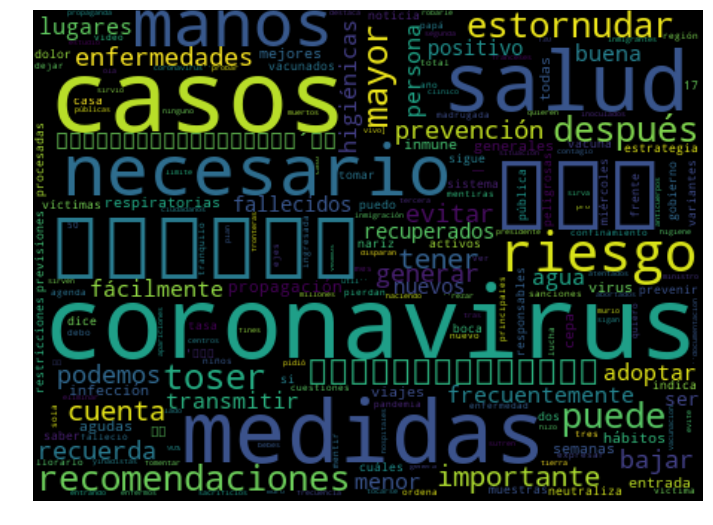

In [45]:
# Generamos la nube de palabras
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

¡Ahora está bastante mejor! Podemos ver que, en general, los tuits hablaban de medidas de prevención contra el coronavirus ("coronavirus", "medidas", "manos", "recomendaciones", "salud", "prevención"...).

Sin embargo, todavía puede mejorar. Así que te propongo el siguiente reto/ejercicio:

## Ejercicios
### 100101
Haz que en la nube de palabras dejen de aparecen los siguientes elementos:
- la palabra "RT", que al ser un corpus de Twitter no nos aporta nada (se debe a ue aparece cada vez que alguien comparte un tuit de otro usuario).
- links: cualquier cosa que empiece por "http"
- vemos que hay unos cuadrados indeseados en nuestra nube de palabras. Esto se debe a que los tuits contienen cadenas como 𝐓𝐎𝐌𝐀 𝐏𝐑𝐄𝐂𝐀𝐔𝐂𝐈𝐎́𝐍, que, en realidad, no son letras, solo lo parecen. Lo mejor sería hacer que solo pasen el filtro las palabras que estén compuestas de letras y los signos que decidamos.

Además, modifica `clean_word()` para que la nube de palabras sí incluya:
- La arroba (@), ya que sirve para identificar usuarios.
- La almohadilla (#), ya que sirve para identificar hashtags (temas).

También sería muy interesante lematizar las palabras, para que "puedo" y "puede" sumen sus valores y cuenten como la misma palabra, pero eso lo veremos en el cuaderno 1003.